In [1]:
from dp_median_binary_search import DpMedianBinarySearch
from dp_median_inverse_sensitivity import DpMedianInverseSensitivity
from dp_median_smooth_sensitivity import DpMedianSmoothSensitivity
from dp_median_svt import DpMedianSvt, DpMedianSvtWithGap
from read_csv import books

import utils

import matplotlib.pyplot as plt
import numpy as np

In [9]:
experiment_uniform_expected_rank_error = []

# experiment_uniform_expected_rank_error_signed = [
#     [],
#     [],
#     [],
#     []
# ]


def do_experiment_uniform(epsilon: float, U: int, N: int, M: int, gap: int, num_of_sample: int=500):
    # Real Median
    result_true = np.ndarray(shape=(num_of_sample), dtype=int)
    # DP Median
    result_raw = np.ndarray(shape=(num_of_sample),dtype=int)
    # Rank Error
    result_loss = np.ndarray(shape=(num_of_sample), dtype=int)
    # Signed Rank Error
    result_loss_signed = np.ndarray(shape=(num_of_sample), dtype=int)

    SVT = DpMedianSvtWithGap(epsilon=epsilon, U=U)
    for i in range(num_of_sample):
        data = utils.uniform_rand_array(N, M)
        result_true[i] = utils.compute_median(data)
        result_raw[i] = SVT.answer(data, gap)
        result_loss[i] = utils.rank_error(data, result_raw[i])
        result_loss_signed[i] = utils.rank_error_signed(data, result_raw[i])
        if i % 10 == 0:
            print(i)
    expected_loss = result_loss.mean(),
    # expected_offset = result_loss_signed.mean()
    experiment_uniform_expected_rank_error.append(expected_loss);

In [10]:
do_experiment_uniform(epsilon=0.1, U=100*1000, N=1000, M=1000, gap=1)
do_experiment_uniform(epsilon=0.1, U=100*1000, N=1000, M=1000, gap=10)
do_experiment_uniform(epsilon=0.1, U=100*1000, N=1000, M=1000, gap=20)
do_experiment_uniform(epsilon=0.1, U=100*1000, N=1000, M=1000, gap=30)
do_experiment_uniform(epsilon=0.1, U=100*1000, N=1000, M=1000, gap=40)
do_experiment_uniform(epsilon=0.1, U=100*1000, N=1000, M=1000, gap=50)
do_experiment_uniform(epsilon=0.1, U=100*1000, N=1000, M=1000, gap=60)
do_experiment_uniform(epsilon=0.1, U=100*1000, N=1000, M=1000, gap=70)
do_experiment_uniform(epsilon=0.1, U=100*1000, N=1000, M=1000, gap=80)
do_experiment_uniform(epsilon=0.1, U=100*1000, N=1000, M=1000, gap=90)
do_experiment_uniform(epsilon=0.1, U=100*1000, N=1000, M=1000, gap=100)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
16

In [11]:
experiment_uniform_expected_rank_error

[(143.198,),
 (62.332,),
 (45.952,),
 (45.644,),
 (43.458,),
 (44.808,),
 (49.676,),
 (54.884,),
 (58.3,),
 (62.976,),
 (63.348,)]

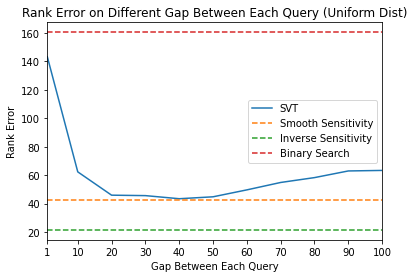

In [12]:
# [[160.465, 183.785, 239.13, 271.72],
#  [21.54, 18.91, 22.8, 22.125],
#  [145.02, 241.925, 323.99, 412.465],
#  [42.61, 41.295, 39.85, 42.385]]

SS = [42.61] * 11
IS = [21.54] * 11
BS = [160.45] * 11

plt.clf()
plt.xlabel("Gap Between Each Query")
plt.ylabel("Rank Error")
plt.xlim((1,100))
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title("Rank Error on Different Gap Between Each Query (Uniform Dist)")

xAxis = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.plot(xAxis, experiment_uniform_expected_rank_error, label="SVT")
plt.plot(xAxis, SS,'--', label="Smooth Sensitivity")
plt.plot(xAxis, IS, '--', label="Inverse Sensitivity")
plt.plot(xAxis, BS, '--', label="Binary Search")
plt.legend()